In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

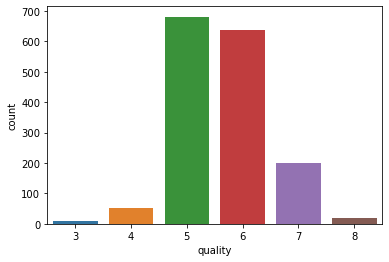

In [9]:
sns.countplot(x='quality',data=df)

In [10]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

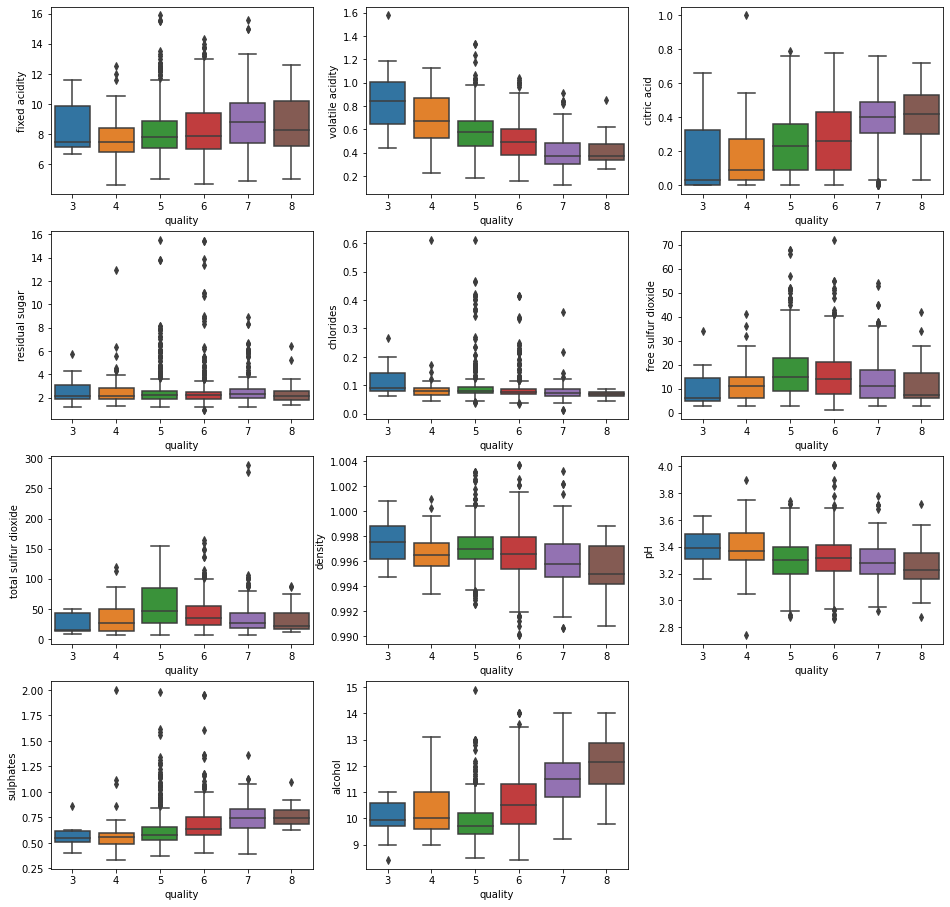

In [11]:
##### write a code that will plot box plot of all independent features vs quality 
features = df.columns[:-1]
fig = plt.figure(figsize=(16,20))
for column,feature in enumerate(features):
    fig.add_subplot(5,3,column+1)
    sns.boxplot(data=df,x='quality',y=feature)

In [21]:
features_

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

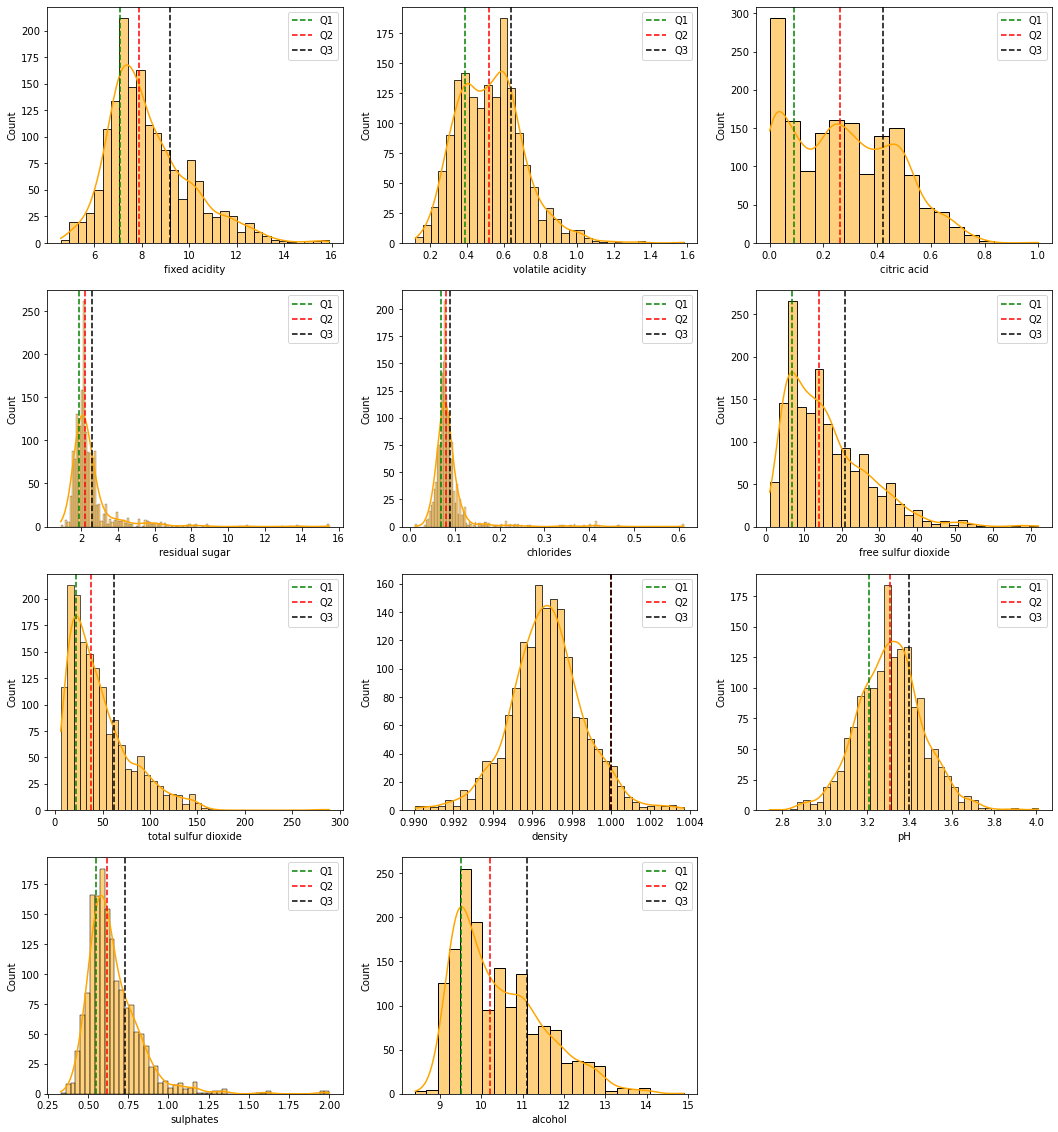

In [14]:
### let's check the distribution of the data
features_ = df.columns[:-1]
def get_percentile(feature,q_range):
    dist = df[feature].describe()[str(q_range)+'%']
    return round(dist,2)
def render_counterplot():
    fig = plt.figure(figsize=(18,20))
    for column, feature in enumerate(features_):
        fig.add_subplot(4,3,column+1)
        q1 = get_percentile(feature,25)
        q2 = get_percentile(feature,50)
        q3 = get_percentile(feature,75)
        sns.histplot(data=df,x=feature,kde=True,color='orange')
        plt.axvline(q1,linestyle='--',color='green',label='Q1')
        plt.axvline(q2,linestyle='--',color='red',label='Q2')
        plt.axvline(q3,linestyle='--',color='black',label='Q3')
        plt.legend()
render_counterplot()

In [22]:
### split features and target
x = df.drop('quality',axis=1)
y = df['quality']

In [23]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [25]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


<AxesSubplot:>

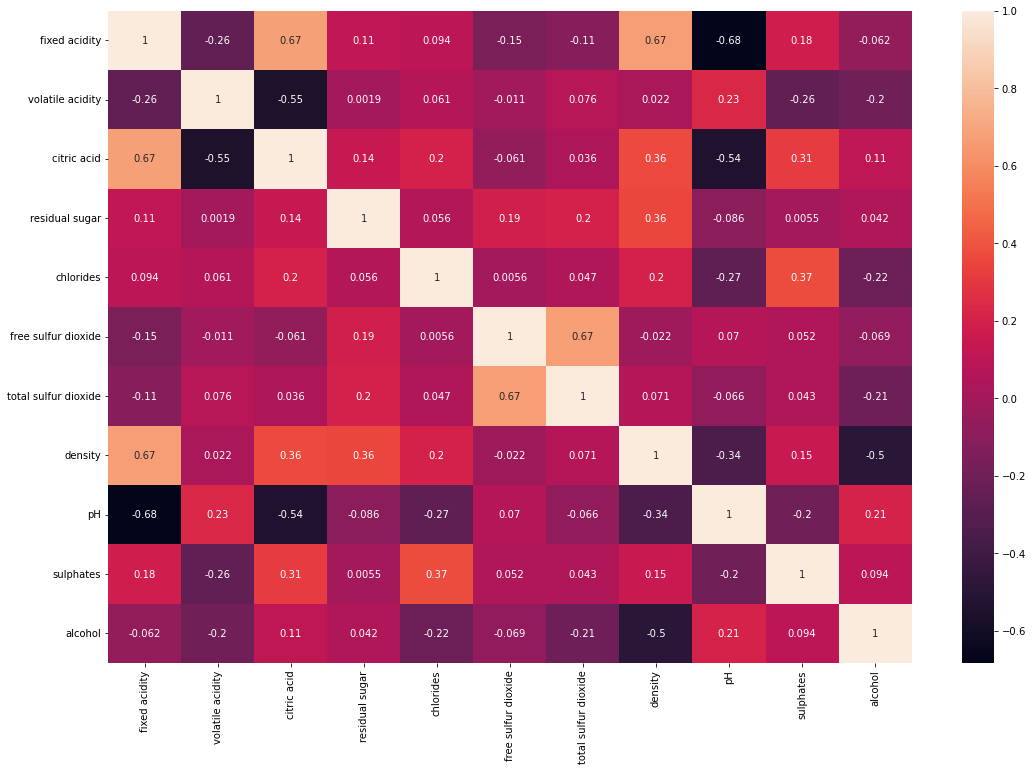

In [26]:
plt.figure(figsize=(18,12))
sns.heatmap(x.corr(),annot=True)

## Handling Imbalanced dataset

In [27]:
from imblearn.over_sampling import SMOTE

In [28]:
smote=SMOTE()
x_sm,y_sm = smote.fit_resample(x,y)

In [29]:
y_sm.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

In [31]:
### train test split and model building
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=42)

In [33]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

In [34]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [35]:
model = Sequential()
model.add(tensorflow.keras.layers.Input(shape=11,))
model.add(tensorflow.keras.layers.Dense(32,activation='relu'))
model.add(tensorflow.keras.layers.Dense(64,activation='relu'))
model.add(tensorflow.keras.layers.Dropout(0.3))
model.add(tensorflow.keras.layers.Dense(256,activation='relu'))
model.add(tensorflow.keras.layers.Dense(6,activation='softmax'))

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))

In [44]:
y_train = tensorflow.keras.utils.to_categorical(y_train,6)
y_test = tensorflow.keras.utils.to_categorical(y_test,6)

In [45]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [47]:
model.fit(x_train,y_train,epochs=400,verbose=1)

Epoch 1/400
103/103 [==============================] - 2s 4ms/step - loss: 1.3934 - accuracy: 0.4354
Epoch 2/400
103/103 [==============================] - 0s 4ms/step - loss: 1.0826 - accuracy: 0.5447
Epoch 3/400
103/103 [==============================] - 0s 4ms/step - loss: 0.9599 - accuracy: 0.6083
Epoch 4/400
103/103 [==============================] - 0s 4ms/step - loss: 0.8971 - accuracy: 0.6444
Epoch 5/400
103/103 [==============================] - 0s 4ms/step - loss: 0.8429 - accuracy: 0.6689
Epoch 6/400
103/103 [==============================] - 0s 4ms/step - loss: 0.8005 - accuracy: 0.6909
Epoch 7/400
103/103 [==============================] - 0s 4ms/step - loss: 0.7662 - accuracy: 0.7044
Epoch 8/400
103/103 [==============================] - 0s 4ms/step - loss: 0.7409 - accuracy: 0.7121
Epoch 9/400
103/103 [==============================] - 0s 4ms/step - loss: 0.7009 - accuracy: 0.7326
Epoch 10/400
103/103 [==============================] - 0s 4ms/step - loss: 0.6747 - accura

103/103 [==============================] - 0s 4ms/step - loss: 0.3054 - accuracy: 0.8794
Epoch 82/400
103/103 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8797
Epoch 83/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2938 - accuracy: 0.8837
Epoch 84/400
103/103 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8776
Epoch 85/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2993 - accuracy: 0.8804
Epoch 86/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2808 - accuracy: 0.8880
Epoch 87/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2753 - accuracy: 0.8856
Epoch 88/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2960 - accuracy: 0.8813
Epoch 89/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2982 - accuracy: 0.8782
Epoch 90/400
103/103 [==============================] - 0s 4ms/step - loss: 0.2822 - accuracy: 

103/103 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9269
Epoch 161/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1989 - accuracy: 0.9183
Epoch 162/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2154 - accuracy: 0.9198
Epoch 163/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2036 - accuracy: 0.9232
Epoch 164/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2096 - accuracy: 0.9116
Epoch 165/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2032 - accuracy: 0.9226
Epoch 166/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2013 - accuracy: 0.9272
Epoch 167/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1971 - accuracy: 0.9293
Epoch 168/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2189 - accuracy: 0.9165
Epoch 169/400
103/103 [==============================] - 0s 3ms/step - loss: 0.2044 - a

103/103 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9373
Epoch 240/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1663 - accuracy: 0.9342
Epoch 241/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9357
Epoch 242/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1999 - accuracy: 0.9229
Epoch 243/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1642 - accuracy: 0.9342
Epoch 244/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1584 - accuracy: 0.9412
Epoch 245/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1759 - accuracy: 0.9333
Epoch 246/400
103/103 [==============================] - 0s 5ms/step - loss: 0.1590 - accuracy: 0.9376
Epoch 247/400
103/103 [==============================] - 0s 5ms/step - loss: 0.1506 - accuracy: 0.9471
Epoch 248/400
103/103 [==============================] - 1s 5ms/step - loss: 0.1723 - a

103/103 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9437
Epoch 319/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9397
Epoch 320/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1486 - accuracy: 0.9431
Epoch 321/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9486
Epoch 322/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.9465
Epoch 323/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.9495
Epoch 324/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1478 - accuracy: 0.9461
Epoch 325/400
103/103 [==============================] - 1s 5ms/step - loss: 0.1491 - accuracy: 0.9400
Epoch 326/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1312 - accuracy: 0.9498
Epoch 327/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1306 - a

103/103 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9550
Epoch 398/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1152 - accuracy: 0.9550
Epoch 399/400
103/103 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9587
Epoch 400/400
103/103 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9535


In [52]:
y_pred = model.predict(x_test)

26/26 [==============================] - 0s 2ms/step


In [53]:
y_pred

array([[8.3651545e-17, 1.0679019e-05, 6.0296351e-01, 3.9702585e-01,
        1.7122175e-11, 1.9694803e-26],
       [5.5697102e-24, 1.5190298e-10, 9.7675437e-01, 2.3245649e-02,
        9.1794847e-09, 1.9923047e-34],
       [1.2053073e-24, 5.0096662e-13, 2.4980184e-06, 2.0304359e-03,
        9.9796706e-01, 5.5208996e-36],
       ...,
       [9.9997580e-01, 4.7372677e-15, 2.4165351e-05, 8.6889612e-10,
        7.5264531e-11, 8.5651672e-30],
       [0.0000000e+00, 1.0000000e+00, 1.3049865e-09, 5.7043947e-09,
        5.7958084e-27, 0.0000000e+00],
       [2.1576704e-25, 1.5716871e-18, 2.4081801e-01, 7.5918198e-01,
        3.3092780e-12, 6.1465359e-18]], dtype=float32)

In [54]:
y_test

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [55]:
y_pred = np.argmax(y_pred,axis=1)

In [56]:
y_pred

array([2, 2, 4, 4, 1, 1, 2, 2, 2, 2, 5, 4, 2, 0, 5, 2, 1, 3, 5, 1, 3, 0,
       2, 2, 1, 0, 3, 0, 3, 5, 2, 0, 5, 3, 0, 3, 2, 5, 1, 4, 5, 5, 3, 4,
       4, 3, 4, 1, 1, 5, 3, 3, 2, 3, 2, 0, 1, 4, 1, 3, 4, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 3, 3, 2, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 1, 4, 1, 4, 5, 5, 1, 5, 1, 2, 2, 3, 2, 0, 4, 4,
       2, 1, 4, 2, 2, 1, 0, 5, 1, 2, 2, 3, 3, 2, 3, 4, 3, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 3, 3, 0, 4, 2, 1, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 4,
       1, 0, 3, 1, 1, 3, 5, 5, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 2, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 3, 2, 5, 3, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 3, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 0, 2, 3, 5, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 5, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [57]:
y_test = np.argmax(y_test,axis=1)
y_test

array([3, 2, 4, 4, 1, 1, 2, 3, 2, 3, 5, 4, 2, 0, 5, 3, 2, 2, 5, 1, 3, 0,
       2, 3, 1, 0, 3, 0, 2, 5, 2, 0, 5, 3, 0, 3, 2, 5, 2, 4, 5, 5, 3, 4,
       4, 2, 4, 2, 1, 5, 3, 3, 2, 3, 3, 0, 1, 4, 1, 3, 3, 1, 3, 0, 5, 1,
       0, 4, 4, 3, 1, 0, 2, 4, 1, 2, 1, 1, 4, 0, 5, 3, 2, 3, 3, 5, 5, 2,
       5, 1, 0, 3, 3, 2, 3, 3, 3, 4, 5, 5, 1, 5, 2, 2, 3, 1, 3, 0, 4, 4,
       3, 1, 4, 3, 2, 3, 0, 5, 1, 2, 2, 2, 3, 2, 3, 4, 2, 4, 2, 0, 4, 4,
       2, 0, 1, 0, 5, 2, 3, 0, 4, 2, 3, 3, 4, 5, 4, 3, 5, 1, 1, 2, 1, 2,
       1, 1, 0, 5, 4, 5, 1, 0, 5, 3, 4, 0, 5, 3, 1, 1, 1, 5, 1, 1, 5, 3,
       3, 0, 3, 1, 1, 2, 5, 5, 4, 4, 2, 4, 2, 4, 2, 3, 2, 4, 3, 1, 1, 0,
       1, 5, 4, 5, 0, 1, 0, 4, 1, 2, 1, 3, 5, 4, 2, 3, 5, 4, 1, 2, 4, 0,
       2, 0, 5, 5, 4, 0, 2, 0, 3, 5, 4, 1, 5, 1, 2, 3, 5, 4, 1, 1, 4, 5,
       0, 1, 3, 3, 1, 2, 3, 4, 1, 3, 3, 5, 1, 4, 2, 1, 2, 2, 1, 4, 0, 3,
       3, 0, 4, 4, 5, 0, 4, 1, 3, 3, 0, 3, 3, 3, 0, 5, 2, 5, 2, 3, 2, 2,
       0, 1, 1, 5, 5, 0, 1, 2, 4, 0, 0, 2, 4, 1, 3,

In [58]:
### evaluation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

85.94132029339853